# 7-3-2021
## Getting that MEC position Data

### Goals
* Since loading up near-yearly MEC data takes ~81min, this script will serve to load such lengthy data then export desired arrays as whatever files to be loaded up in other scripts
1. Load up MEC position data(GSM coord) for corresponding date
2. Map said data onto the OMNI data to match the 5min time cadence
3. Confirm that MEC position and OMNI time arrays match
4. Export desired MEC position and time arrays

* Since the goal is to export desired MEC position data, this'll run probably once if now a few times if errors occur

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize 

import numpy as np
import pytplot
import pyspedas
import copy

from pyspedas import mms, themis, cluster #importing mission modules
from pyspedas.mms import fgm, fpi, curlometer #import instrument load routines
from pyspedas import tinterpol #to match MEC data to OMNI 5min time stamps

from pytplot import tplot         # plot said tplot variables
from pytplot import tplot_names   # list tplot variables loaded
from pytplot import get_data      # extract data values from tplot variables
from pyspedas import time_string  # convert unix time to string
from pytplot import store_data    # creating tplot variables
from pytplot import options       # extra tplot features for individial tplots
from pytplot import tplot_options # global tplot options for created tplots

import time


* Test Cells for exporting MEC position data(GSM coord)
    * Using numpy to export aarrays:
        * https://stackoverflow.com/questions/37996295/how-to-save-numpy-array-into-computer-for-later-use-in-python
        * https://stackoverflow.com/questions/28439701/how-to-save-and-load-numpy-array-data-properly
        * https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/

# Loading Up OMNI and MEC rountines

In [2]:
pytplot.del_data()  #delete previously loaded tplot variables
trange_yr1 = ['2015-09-01', '2016-05-31']
trange_yr2 = ['2016-09-01', '2017-05-31']
trange_yr3 = ['2017-09-01', '2018-05-31']
trange_yr4 = ['2018-09-01', '2019-05-31']
trange_yr5 = ['2019-09-01', '2020-05-31']

test_date = ['2015-09-01', '2015-09-02']

def getSWMECParam(achDate, n):
# Load/return Year X OMNI data arrays with inputted tuple index and string list date range
    print('\nInput date was: %s (Year %d)' %(achDate, n+1) )
    omni_vars = pyspedas.omni.data(trange= achDate, datatype = '5min') #extracting data with 5min resolution
    flowv_time, flowv_val = get_data('flow_speed') 
    mec_vars = pyspedas.mms.mec(trange = achDate, data_rate = 'srvy') # default MEC resolution will be 30 sec for survey mode data
    #Defining string variables for OMNI start and end time
    achOmni_start = time_string(flowv_time[0])
    achOmni_end = time_string(flowv_time[-1])
    print('\nConfirming loaded OMNI data range: %s to %s' %(achOmni_start[0:10], achOmni_end[0:20]));
   
    return (flowv_time, flowv_val);

Flow_time, Flow_vals = getSWMECParam(test_date, 1)



19-Jul-21 14:18:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_5min/2015/



Input date was: ['2015-09-01', '2015-09-02'] (Year 2)


19-Jul-21 14:18:31: File is current: omni_data/hro2_5min/2015/omni_hro2_5min_20150901_v01.cdf
19-Jul-21 14:18:31: /Users/salinasha/pyspedas-env/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Time clip was applied to: IMF
Time clip was applied to: PLS
Time clip was applied to: IMF_PTS
Time clip was applied to: PLS_PTS
Time clip was applied to: percent_interp
Time clip was applied to: Timeshift
Time clip was applied to: RMS_Timeshift
Time clip was applied to: Time_btwn_obs
Time clip was applied to: F
Time clip was applied to: BX_GSE
Time clip was applied to: BY_GSE
Time clip was applied to: BZ_GSE
Time clip was applied to: BY_GSM
Time clip was applied to: BZ_GSM
Time clip was applied to: RMS_SD_B
Time clip was applied to: RMS_SD_fld_vec
Time clip was applied to: flow_speed
Time clip was applied to: Vx
Time clip was applied to: Vy
Time clip was applied to: Vz
Time clip was applied to: proton_density
Time clip was applied to: T
Time clip was applied to: NaNp_Ratio
Time clip was applied to: Pressure
Time clip was applied to: E
Time clip was applied to: Beta
Time clip was applied to: Mach_num
Time clip was applied to: Mgs_mach_num
Time clip was applied to: x
Time clip was applie

19-Jul-21 14:18:33: Loading pydata/mms1/mec/srvy/l2/ephts04d/2015/09/mms1_mec_srvy_l2_ephts04d_20150901_v2.0.0.cdf


Loaded variables:
mms1_mec_dipole_tilt
mms1_mec_gmst
mms1_mec_mlat
mms1_mec_mlt
mms1_mec_l_dipole
mms1_mec_quat_eci_to_bcs
mms1_mec_quat_eci_to_dbcs
mms1_mec_quat_eci_to_dmpa
mms1_mec_quat_eci_to_smpa
mms1_mec_quat_eci_to_dsl
mms1_mec_quat_eci_to_ssl
mms1_mec_L_vec
mms1_mec_Z_vec
mms1_mec_P_vec
mms1_mec_L_phase
mms1_mec_Z_phase
mms1_mec_P_phase
mms1_mec_kp
mms1_mec_dst
mms1_mec_earth_eclipse_flag
mms1_mec_moon_eclipse_flag
mms1_mec_r_eci
mms1_mec_v_eci
mms1_mec_r_gsm
mms1_mec_v_gsm
mms1_mec_quat_eci_to_gsm
mms1_mec_r_geo
mms1_mec_v_geo
mms1_mec_quat_eci_to_geo
mms1_mec_r_sm
mms1_mec_v_sm
mms1_mec_quat_eci_to_sm
mms1_mec_r_gse
mms1_mec_v_gse
mms1_mec_quat_eci_to_gse
mms1_mec_r_gse2000
mms1_mec_v_gse2000
mms1_mec_quat_eci_to_gse2000
mms1_mec_geod_lat
mms1_mec_geod_lon
mms1_mec_geod_height
mms1_mec_r_sun_de421_eci
mms1_mec_r_moon_de421_eci
mms1_mec_fieldline_type
mms1_mec_bsc_gsm
mms1_mec_loss_cone_angle_s
mms1_mec_loss_cone_angle_n
mms1_mec_pfs_geod_latlon
mms1_mec_pfn_geod_latlon
mms1_m

In [3]:
r_time, mecr = get_data('mms1_mec_r_gse')
print(time_string(r_time[:10]))

['2015-09-01 00:00:00.000000', '2015-09-01 00:00:30.000000', '2015-09-01 00:01:00.000000', '2015-09-01 00:01:30.000000', '2015-09-01 00:02:00.000000', '2015-09-01 00:02:30.000000', '2015-09-01 00:03:00.000000', '2015-09-01 00:03:30.000000', '2015-09-01 00:04:00.000000', '2015-09-01 00:04:30.000000']


10-Jul-21 16:39:35: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



0 : IMF
1 : PLS
2 : IMF_PTS
3 : PLS_PTS
4 : percent_interp
5 : Timeshift
6 : RMS_Timeshift
7 : Time_btwn_obs
8 : F
9 : BX_GSE
10 : BY_GSE
11 : BZ_GSE
12 : BY_GSM
13 : BZ_GSM
14 : RMS_SD_B
15 : RMS_SD_fld_vec
16 : flow_speed
17 : Vx
18 : Vy
19 : Vz
20 : proton_density
21 : T
22 : NaNp_Ratio
23 : Pressure
24 : E
25 : Beta
26 : Mach_num
27 : Mgs_mach_num
28 : x
29 : y
30 : z
31 : BSN_x
32 : BSN_y
33 : BSN_z
34 : AE_INDEX
35 : AL_INDEX
36 : AU_INDEX
37 : SYM_D
38 : SYM_H
39 : ASY_D
40 : ASY_H
41 : PR-FLX_10
42 : PR-FLX_30
43 : PR-FLX_60
44 : mms1_mec_dipole_tilt
45 : mms1_mec_gmst
46 : mms1_mec_mlat
47 : mms1_mec_mlt
48 : mms1_mec_l_dipole
49 : mms1_mec_quat_eci_to_bcs
50 : mms1_mec_quat_eci_to_dbcs
51 : mms1_mec_quat_eci_to_dmpa
52 : mms1_mec_quat_eci_to_smpa
53 : mms1_mec_quat_eci_to_dsl
54 : mms1_mec_quat_eci_to_ssl
55 : mms1_mec_L_vec
56 : mms1_mec_Z_vec
57 : mms1_mec_P_vec
58 : mms1_mec_L_phase
59 : mms1_mec_Z_phase
60 : mms1_mec_P_phase
61 : mms1_mec_kp
62 : mms1_mec_dst
63 : mms1_me

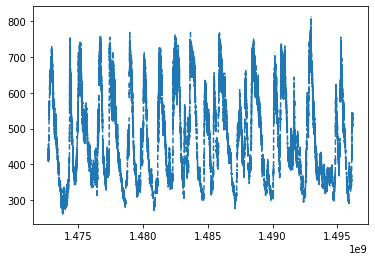

10-Jul-21 16:39:36: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

10-Jul-21 16:39:42: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mouseEnabled = np.array(self.state['mouseEnabled'], dtype=np.float)

10-Jul-21 16:39:42: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: Deprecation

In [4]:
### Confirm loaded tplot variables match above input date by tploting 'flow speed' and plt.plotting 'flow_test'
tplot_names()
tplot('flow_speed')
plt.plot(Flow_time, Flow_vals, '--');

In [ ]:
##use the tinterpol() to map the time stamps of whichever MEC variable, and it's corresponding time array, to the
## time cadence of the OMNI variable
# This will create "mms1_mec_r_gsm-itrp" with the same time stamps as "flow_speed".
#the variable we're interpolating too must be a tplot variable
    #interpol feature works if I rename an extracted tplot variable
#store_data('flow_vals', data={'x': Flow_time, 'y': Flow_vals})
#tplot(['mms1_mec_r_gsm', 'flow_speed'])
#tinterpol('mms1_mec_r_gsm', 'flow_speed') #the variable we're interpolating too must be a tplot variable
#tplot_names();
    


### Issue with Yr2 MEC data:
* For some odd reason, in spite of the MEC data loading properly using the interpolate function with 'flow speed' gives an indexing error
    * Awaiting Eric's reponse
       * Depending on answer, I might create my own function to match onto OMNI data's 5min time step
### (7-10-21) Fix With Interpolating Yr2 MEC data

In [11]:
##From Eric, find duplicate point in data
### tinterpol requires the variables to be monotonically increasing, 
###and it looks like 'mms1_mec_r_gsm' has a duplicate point at the year 2016-2017 boundary:

d = get_data('mms1_mec_r_gsm')
wherenonmono = np.where(d.times[0:-1] >= d.times[1:])
print(wherenonmono)

print(time_string(d.times[351360]))

#The next timestamp is a duplicate:
print(time_string(d.times[351361]))

####Eric's fix for pySPEDAS
#You can fix this data point by avoiding this boundary, or by deleting the duplicate point with:

new_data = np.delete(d.y, 351360, axis=0)
new_times = np.delete(d.times, 351360)
store_data('mms1_mec_r_gsm_fixed', {'x': new_times, 'y': new_data})
tinterpol('mms1_mec_r_gsm_fixed', 'flow_speed')


10-Jul-21 16:45:56: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



(array([351360], dtype=int64),)
2017-01-01 00:00:00.000000
2017-01-01 00:00:00.000000
tinterpol (linear) was applied to: mms1_mec_r_gsm_fixed-itrp


In [12]:
tplot_names();
tplot(['mms1_mec_r_gsm_fixed-itrp', 'flow_speed'])


10-Jul-21 16:46:11: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



0 : IMF
1 : PLS
2 : IMF_PTS
3 : PLS_PTS
4 : percent_interp
5 : Timeshift
6 : RMS_Timeshift
7 : Time_btwn_obs
8 : F
9 : BX_GSE
10 : BY_GSE
11 : BZ_GSE
12 : BY_GSM
13 : BZ_GSM
14 : RMS_SD_B
15 : RMS_SD_fld_vec
16 : flow_speed
17 : Vx
18 : Vy
19 : Vz
20 : proton_density
21 : T
22 : NaNp_Ratio
23 : Pressure
24 : E
25 : Beta
26 : Mach_num
27 : Mgs_mach_num
28 : x
29 : y
30 : z
31 : BSN_x
32 : BSN_y
33 : BSN_z
34 : AE_INDEX
35 : AL_INDEX
36 : AU_INDEX
37 : SYM_D
38 : SYM_H
39 : ASY_D
40 : ASY_H
41 : PR-FLX_10
42 : PR-FLX_30
43 : PR-FLX_60
44 : mms1_mec_dipole_tilt
45 : mms1_mec_gmst
46 : mms1_mec_mlat
47 : mms1_mec_mlt
48 : mms1_mec_l_dipole
49 : mms1_mec_quat_eci_to_bcs
50 : mms1_mec_quat_eci_to_dbcs
51 : mms1_mec_quat_eci_to_dmpa
52 : mms1_mec_quat_eci_to_smpa
53 : mms1_mec_quat_eci_to_dsl
54 : mms1_mec_quat_eci_to_ssl
55 : mms1_mec_L_vec
56 : mms1_mec_Z_vec
57 : mms1_mec_P_vec
58 : mms1_mec_L_phase
59 : mms1_mec_Z_phase
60 : mms1_mec_P_phase
61 : mms1_mec_kp
62 : mms1_mec_dst
63 : mms1_me

10-Jul-21 16:46:12: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

10-Jul-21 16:46:12: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

10-Jul-21 16:46:14: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Depre

In [13]:
##Extract and define interpolated-MEC position and time arrays
def get_mec_pos(flowv_time):
#After using interpol to match mec_r_gsm time cadence to flow speed, confirm time array matches og 'flow time'
# and extract position data
    tplot(['mms1_mec_r_gsm_fixed-itrp', 'mms1_mec_r_gsm_fixed'])
    pos_time, rpos = get_data('mms1_mec_r_gsm_fixed-itrp') #extracting both time and vector position array(unit = km)
    #Defining string variables for intrp-MEC start and end time
    #Creating copies of extracted position data
    #ptime_copy = copy.deepcopy(pos_time)
    #rpos_copy = copy.deepcopy
    achMEC_start = time_string(pos_time[0])
    achMEC_end = time_string(pos_time[-1])
    print(time_string(pos_time[:10]),'\n', rpos[:10])
    print('\nConfirming loaded intrp-MEC data range: %s to %s' %(achMEC_start[0:10], achMEC_end[0:20]));
    print('OMNI and interp-MEC time arrays are identical: ',np.array_equal(pos_time, flowv_time))
    rpos_mag = np.sqrt(rpos[:,0]**2 + rpos[:,1]**2 + rpos[:,2]**2)
    
    # Defining copy of the time array with Bmag's nanvalue locations(errors occur with modifying orginal)
    #time_nan = copy.deepcopy(afUtime) #create copy of array(can modify copy without affecting the original array)
    return (pos_time, rpos[:,0], rpos[:,1], rpos[:,2], rpos_mag);

(afRtime, afXgsm, afYgsm, afZgsm, afRmag_gsm) = get_mec_pos(Flow_time)



#def get_mec_no_interp

10-Jul-21 16:47:49: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



['2016-09-01 00:00:00.000000', '2016-09-01 00:05:00.000000', '2016-09-01 00:10:00.000000', '2016-09-01 00:15:00.000000', '2016-09-01 00:20:00.000000', '2016-09-01 00:25:00.000000', '2016-09-01 00:30:00.000000', '2016-09-01 00:35:00.000000', '2016-09-01 00:40:00.000000', '2016-09-01 00:45:00.000000'] 
 [[-32210.88042631  66776.12241798 -16657.0919968 ]
 [-32443.47916797  66601.68711378 -16627.15758365]
 [-32673.44058849  66420.77173637 -16600.33195515]
 [-32900.73955089  66233.39682915 -16576.52036284]
 [-33125.35041237  66039.58252851 -16555.62405723]
 [-33347.24709591  65839.34860224 -16537.54014833]
 [-33566.40308678  65632.71433563 -16522.16187039]
 [-33782.7913736   65419.69852132 -16509.37862141]
 [-33996.38440758  65200.31975938 -16499.07597122]
 [-34207.15403786  64974.5966066  -16491.13593631]]

Confirming loaded intrp-MEC data range: 2016-09-01 to 2017-05-31 00:00:00.
OMNI and interp-MEC time arrays are identical:  True


10-Jul-21 16:47:52: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

10-Jul-21 16:47:52: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)



10-Jul-21 16:48:51: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



MEC time:
 ['2016-09-01 00:00:00.000000', '2016-09-01 00:05:00.000000', '2016-09-01 00:10:00.000000', '2016-09-01 00:15:00.000000', '2016-09-01 00:20:00.000000', '2016-09-01 00:25:00.000000', '2016-09-01 00:30:00.000000', '2016-09-01 00:35:00.000000', '2016-09-01 00:40:00.000000', '2016-09-01 00:45:00.000000'] 
 MEC rmag(in km):
 [75987.17034348 75926.45412658 75860.68585879 75789.85780342
 75713.96164781 75632.98848651 75546.92872723 75455.772013
 75359.50741225 75258.12352185]


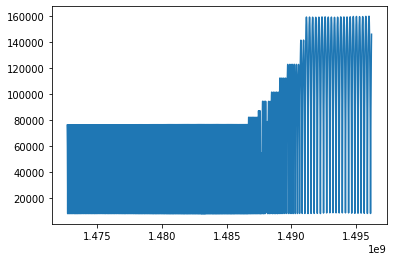

10-Jul-21 16:48:52: C:\Users\hecin\pyspedas-env\lib\site-packages\pytplot\QtPlotter\CustomAxis\AxisItem.py:180: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  color.setAlpha(lineAlpha)

10-Jul-21 16:49:09: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mouseEnabled = np.array(self.state['mouseEnabled'], dtype=np.float)

10-Jul-21 16:49:09: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: Deprecation

10-Jul-21 16:49:11: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mouseEnabled = np.array(self.state['mouseEnabled'], dtype=np.float)

10-Jul-21 16:49:11: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.or

10-Jul-21 16:49:13: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mouseEnabled = np.array(self.state['mouseEnabled'], dtype=np.float)

10-Jul-21 16:49:15: C:\Users\hecin\pyspedas-env\lib\site-packages\pyqtgraph\graphicsItems\ViewBox\ViewBox.py:1240: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.or

In [14]:
##Old test of comparing copy and original array
print('MEC time:\n',time_string(afRtime[:10]),'\n MEC rmag(in km):\n', afRmag_gsm[:10])

plt.plot(afRtime, afRmag_gsm, '-')
tplot('mms1_mec_r_gsm_fixed-itrp')
'''
rmag_copy = copy.deepcopy(afRmag_gsm)
print('Not exluding nan-values, og and copy are the same:', np.array_equal(rmag_copy, afRmag_gsm))
print('Exlcuding nan-values, og and copy are the same:',
      np.array_equal(rmag_copy[~np.isnan(rmag_copy)], afRmag_gsm[~np.isnan(afRmag_gsm)]))

Rcopy_trim = rmag_copy[~np.isnan(rmag_copy)]
Rog_trim = afRmag_gsm[~np.isnan(afRmag_gsm)]

###Calculation for avg relative error between OG and copy array
fSum = 0
for i in range(len(Rcopy_trim)):
    if np.abs(Rcopy_trim[i]-Rog_trim[i]) != np.nan:
        fSum = fSum + np.abs(Rcopy_trim[i]-Rog_trim[i])/Rog_trim[i]
        
print('Avg relative error is', fSum/len(Rcopy_trim))
''';

In [15]:
##Export/save test mec position and time arrays as npz file
#np.savez('yr2_MECgsm_posdata.npz', t = afRtime, x = afXgsm, y = afYgsm, z = afZgsm, rmag = afRmag_gsm)

#np.save('test_mec_time.npy', afR_time)
#np.save('test_mec_rmag.npy', afRmag_gsm)
#np.savetxt('test2_rmag.txt', afRmag_gsm, fmt = '%f') 

10-Jul-21 16:50:03: C:\Users\hecin\pyspedas-env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



### Note on comparing original and re-imported array
* For some odd reason when using np.array_equal() to compare imported and original array, that code and any other personal algorithm breaks. Only when nan-values are excluded, do they reveal the truth of them being the same array 
    * Additionally, in the event that the arrays don't exactly match(to some nth decimal place), computing the average relative error between the arrays yields $\approx 10^{-12}$. Which is an acceptable tolerance
    * Nan-values are trimmed becuase in spite of the imported and original arrays sharing the same nan-value locations, with all other elements being the same. Using any comparitive algorithm doesn't uphold the truth of them  being the same array. In further analysis, it seems that their resoective nan-values don't match
    * Seemingly only occurs with pyspedas extracted data arrays
    
* As indicated by stackexchange, when comparing arrays that contain nan-values, I need to input some command or code that ensures the nan-values of both arrays are the same less I get a false error when comparing
    * https://stackoverflow.com/questions/10710328/comparing-numpy-arrays-containing-nan
        * np.allclose has a feature which enables all nanvalues to be equal
    * NaN values never compare equal. That is, the test NaN==NaN is always False by definition of NaN.

In [16]:
def namestr(obj, namespace):
## (as defined by the a stackoverflowuser) returns name of object as a string list
    return [name for name in namespace if namespace[name] is obj]
def compare_arrays(data1, data2):
#Compares arrays that contain nan-values by first comparing nan-value locations and then arrays without nan-vals
## turns out by default (Nan == Nan) returns false by definition, hence this here function
    print('\nData arrays whose elements are being compared:\n', 
          namestr(data1, globals()),namestr(data2, globals()))
    print('Lengths of inputted data arrays are respectively %d and %d'%(len(data1), len(data2)))
    anNan1 = np.argwhere(np.isnan(data1)) #define array of indices of nan-values
    anNan2 = np.argwhere(np.isnan(data2))
    print('Length of anNan1 and anNan2 are respectively %d and %d' %(len(anNan1), len(anNan2)))
    bJustnans = np.array_equal(anNan1, anNan2) #check if nan-value indices are the same
    bNonans = np.array_equal(data1[~np.isnan(data1)], data2[~np.isnan(data2)])#check if arrays w/out nan-values are the same
    if bJustnans == True and bNonans == True: #arrays match for same nan-value locations and matching elements
        print('Both original and exported arrays are the same')
    else:
        print('Original and exported arrays are nor the same :(')
    return;

In [18]:
##Load npz test mec position and time arrays
#yr2_load_MECposdata = np.load('yr2_MECgsm_posdata.npz')
print(sorted(yr2_load_MECposdata))

#'''
test_MECtime = yr2_load_MECposdata['t']
test_MECx = yr2_load_MECposdata['x']
test_MECy = yr2_load_MECposdata['y']
test_MECz = yr2_load_MECposdata['z']
test_MECr = yr2_load_MECposdata['rmag']

###Using np.array_equal and np.allclose to compare original and exported arrays
##Displaying if imported and exported arrays match as they should
#[~np.isnan] is used becuase for some reason, the nan-values of both arrays, which share the same location and type
# don't match
print('OG interp-MEC time and loaded time arrays match:', np.array_equal(afRtime, test_MECtime))

print('Exluding nan-values, OG interp-MEC rmag and loaded rmag arrays match:', 
      np.array_equal(afRmag_gsm[~np.isnan(afRmag_gsm)], test_MECr[~np.isnan(afRmag_gsm)]))

print('Exluding nan-values, OG interp-MEC and loaded X-arrays match:', 
      np.array_equal(afXgsm[~np.isnan(afXgsm)], test_MECx[~np.isnan(test_MECx)]))

print('Exluding nan-values, OG interp-MEC and loaded Y-arrays match:', 
      np.array_equal(afYgsm[~np.isnan(afYgsm)], test_MECy[~np.isnan(test_MECy)]))

print('Exluding nan-values, OG interp-MEC and loaded Z-arrays match:', 
      np.array_equal(afZgsm[~np.isnan(afZgsm)], test_MECz[~np.isnan(test_MECz)]))


##Ensuring both arrays nan-values are the same when comparing
print('Using np.allclose, OG and loaded rmag arrays match:',np.allclose(afRmag_gsm, test_MECr, equal_nan = True))
print('Using np.allclose, OG and loaded x arrays match:',np.allclose(afXgsm, test_MECx, equal_nan = True)) 
print('Using np.allclose, OG and loaded y arrays match:',np.allclose(afYgsm, test_MECy, equal_nan = True)) 
print('Using np.allclose, OG and loaded z arrays match:',np.allclose(afZgsm, test_MECz, equal_nan = True)) 



#''';

['rmag', 't', 'x', 'y', 'z']
OG interp-MEC time and loaded time arrays match: True
Exluding nan-values, OG interp-MEC rmag and loaded rmag arrays match: True
Exluding nan-values, OG interp-MEC and loaded X-arrays match: True
Exluding nan-values, OG interp-MEC and loaded Y-arrays match: True
Exluding nan-values, OG interp-MEC and loaded Z-arrays match: True
Using np.allclose, OG and loaded rmag arrays match: True
Using np.allclose, OG and loaded x arrays match: True
Using np.allclose, OG and loaded y arrays match: True
Using np.allclose, OG and loaded z arrays match: True


In [19]:
##Using custom function to compare arrays
print(time_string(test_MECtime[:5]), '\n', time_string(test_MECtime[-5:]))
    #^---displaying 1st and last 5 elements of the array
compare_arrays(afRmag_gsm, test_MECr)
compare_arrays(afXgsm, test_MECx)
compare_arrays(afYgsm, test_MECy)
compare_arrays(afZgsm, test_MECz)

['2016-09-01 00:00:00.000000', '2016-09-01 00:05:00.000000', '2016-09-01 00:10:00.000000', '2016-09-01 00:15:00.000000', '2016-09-01 00:20:00.000000'] 
 ['2017-05-30 23:40:00.000000', '2017-05-30 23:45:00.000000', '2017-05-30 23:50:00.000000', '2017-05-30 23:55:00.000000', '2017-05-31 00:00:00.000000']

Data arrays whose elements are being compared:
 ['afRmag_gsm'] ['test_MECr']
Lengths of inputted data arrays are respectively 78337 and 78337
Length of anNan1 and anNan2 are respectively 650 and 650
Both original and exported arrays are the same

Data arrays whose elements are being compared:
 ['afXgsm'] ['test_MECx']
Lengths of inputted data arrays are respectively 78337 and 78337
Length of anNan1 and anNan2 are respectively 650 and 650
Both original and exported arrays are the same

Data arrays whose elements are being compared:
 ['afYgsm'] ['test_MECy']
Lengths of inputted data arrays are respectively 78337 and 78337
Length of anNan1 and anNan2 are respectively 650 and 650
Both origi

In [ ]:

def checkin_nanvals(Data1, Data2):
#Checks if input data arrays share the same nan-value locations
#Both Nan-arrays should have same legnth and elements(index locations)
    print('\nData arrays whose nanvalue indices are being compared:\n', 
          namestr(Data1, globals()),namestr(Data2, globals()))
    # Define array of nan-value indices and display their properties
    anNan1 = np.argwhere(np.isnan(Data1)) #define array of indices of nan-values
    anNan2 = np.argwhere(np.isnan(Data2))
    print('Length of anNan1 and anNan2 are respectively %d and %d' %(len(anNan1), len(anNan2)))
    #print('\nanNan1 is\n', anNan1, '\nanNan2 is\n', anNan2)
    # Checks if nan-index arrays are equal(same length and elements) using a built in function and for loop
    print('\nUsing np.array_equal(), the nan-index arrays are equal: %s' %np.array_equal(anNan1, anNan2))
    nCount = 0 #initializing counting variable
    if len(anNan1) == len(anNan2): #check if nan-arrays have same length
        for i in range(len(anNan1)):
            #print('Element %d of both arrays(%d and %d) are equal: %s' %(i, anNan1[i][0], anNan2[i][0], 
            if anNan1[i][0]==anNan2[i][0]: #check if nan-arrays share the same elements
                nCount = nCount + 1
        print('\nUsing a for loop')
        if nCount == len(anNan2):
            print('Both nan-index arrays(same length) share the same elements, and thus same nan-value locations')
        else:
            print('They do not share the same nan-value locations')
    else: #Display for if the lengths are not equal
        print('\nNan arrays are not the same length, and thus do not have the same nanvalue locations')
    return;

def same_arrays(Data1, Data2):
#Checks if input data arrays share the same length and elements
    print('\nData arrays whose elements are being compared:\n', 
          namestr(Data1, globals()),namestr(Data2, globals()))
    print('Lengths of inputted data arrays are respectively %d and %d'%(len(Data1), len(Data2)))
    # Checks if arrays are equal(same length and elements) using a built in function and for loop
    print('Using np.array_equal(), the nan-index arrays are equal: %s' %np.array_equal(Data1, Data2))
    nCount = 0 #initializing counting variable
    if len(Data1) == len(Data2): #check if nan-arrays have same length
        for i in range(len(Data1)):
            if Data1[i]==Data2[i]: #check if arrays share the same elements
                nCount = nCount + 1
            else:
                print('No equality at index %d, where (Data1 == %0.2f) != (Data2 == %0.2f)'%(i, Data1[i], Data2[i]))
        print('\nUsing a for loop')
        if nCount == len(Data2):
            print('Both nan-index arrays(same length) share the same elements and index locations')
        else:
            print('They do not share the same element locations')
    else: #Display for if the lengths are not equal
        print('\nNan arrays are not the same length, and thus do not share the same element locations')
    return;




#same_arrays(afRmag_gsm[~np.isnan(afRmag_gsm)], load_rmag[~np.isnan(load_rmag)])

#R_trim = afRmag_gsm[~np.isnan(afRmag_gsm)]
#test2_rtrim = test2_rmag[~np.isnan(test2_rmag)]
#print('Avg relative error = ', np.average(np.abs(R_trim-test2_rtrim)/R_trim))
        
#checkin_nanvals(test_MECr, afRmag_gsm)
#print(np.array_equal(afRmag_gsm, afRmag_gsm))
#same_arrays(test_MECx[~np.isnan(test_MECx)], afXgsm[~np.isnan(afXgsm)])
#print(type(test_MECr[288]), type(afRmag_gsm[288]))
#print('Are they equal:', test_MECr[288] == afRmag_gsm[288])

#print(np.allclose(afRmag_gsm, test_MECr, equal_nan = True)) #ensure nan-values in both matrices are the same

#compare_arrays(afXgsm, test_MECx)

### Different Methods of exporting array(s) as certain file types

In [ ]:
'''
#Using numpy's savetxt and save to export files as CSV, txt, and npy format
np.savetxt('time_test.csv', Time_test, delimiter = ',') #saving to csv file
np.savetxt('time_test.txt', Time_test, fmt = '%f' )#saving to txt file; gotta know element type
np.save('time_test.npy', Time_test) #saving as NPY(binary) file

np.savez('flowntime.npz', Time_test, Flow_test)
##The loaded arrays are returned from the load() function 
##in a dict with the names ‘arr_0’ for the first array, ‘arr_1’ for the second, and so on.
''';

In [ ]:
'''
##Using loadtxt and load to upload above exported arrays
tim_test1 = np.loadtxt('time_test.csv', delimiter = ',')
tim_test2 = np.loadtxt('time_test.txt', dtype = float) #if a txt file, makes sure you know what type of objects are in the arrays
tim_test3 = np.load('time_test.npy')

test4_npz = np.load('flowntime.npz')
print(sorted(test4_npz))
tim_test4 = test4_npz['arr_0']
#flow_timtest = test4_npz['arr_1']
''';

In [ ]:
'''
print('OG time array matches loaded CSV time array:', np.array_equal(Time_test, tim_test1))
print('OG time array matches loaded txt time array:', np.array_equal(Time_test, tim_test2))
print('OG time array matches loaded npy time array:', np.array_equal(Time_test, tim_test3))
print('OG time array matches loaded npz time array:', np.array_equal(Time_test, tim_test4))
#print('OG flow array matches loaded npz flow array:', np.array_equal(Flow_test, flow_timtest))



print('\n',time_string(Time_test[:10]), '\n', time_string(tim_test1[:10]), '\n', time_string(tim_test2[:10]),
     '\n', time_string(tim_test4[:10]))
''';

## Note on exporting arrays as CSV, txt, or npy(binary) files
* Exporting as npy produces small files[they're in binary] which load up fast, but are unviewable without using np.load; Full Yr ~ 615kb
* Exporting as CSV files are viewable through whatever software, but they're significantly larger files than the others; Full Yr ~ 2mb
* Exporting as txt files are viewable and offer a happy medium between NPY and CSV file sizes; Full Yr ~ 1.5mb

In [ ]:
'''
x = np.linspace(0, 40, 200)
y = np.linspace(0,50,200)
r = np.sqrt(x**2 + y**2)

np.savez('test_genr.npz', x = x, y = y, r = r)

test_gendata = np.load('test_genr.npz')
x_load = test_gendata['x']
print(np.array_equal(x, x_load))
''';

In [ ]:
type(np.inf)

In [ ]:
np.inf == (np.inf**2)